# Data Visualization

Data visualizations with **seaborn**, a powerful but easy-to-use data visualization tool.

The choice of tools depends on what you plan to achieve i.e

- **Trends:** sns.lineplot
- **Relationships:** sns.barplot, sns.heatmap, sns.scatterplot, sns.regplot, sns.lmplot, sns.swarmplot 
- **Distributions:** sns.jointplot, sns.kdeplot, sns.distplot

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cbk_df = pd.read_csv('Key-CBK-Indicative-Exchange-Rates-2015.csv', index_col = 'Date', parse_dates = True)
cbk_df.head()

,Currency,Mean,Buy,Sell
Date,,,,
2015-02-01,US DOLLAR,90.7031,90.6239,90.7822
2015-02-01,STG POUND,140.9997,140.8611,141.1383
2015-02-01,EURO,109.3914,109.2844,109.4983
2015-02-01,SA RAND,7.8066,7.7973,7.8159
2015-02-01,KES / USHS,30.5944,30.5126,30.6762


**index_col="Date"** - When we load the dataset, we want each entry in the first column to denote a different row. To do this, we set the value of index_col to the name of the first column.

**parse_dates=True** - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).

**Note:** You must select the indexing column with cbk_df.index, and it is not possible to use cbk_df['Date'] (which will return an error). This is because when we loaded the dataset, the "Date" column was used to index the rows. We always have to use this special notation to select the indexing column.

In [2]:
# select US DOlLAR entries from 2015-02-01 to 20/11/2015
cbk_df[cbk_df['Currency'] == 'US DOLLAR'].loc['2015-02-01': '20/11/2015'].head()

,Currency,Mean,Buy,Sell
Date,,,,
2015-02-01,US DOLLAR,90.7031,90.6239,90.7822
2015-05-01,US DOLLAR,90.7944,90.7056,90.8833
2015-06-01,US DOLLAR,90.8222,90.7417,90.9028
2015-07-01,US DOLLAR,90.9228,90.8450,91.0006
2015-08-01,US DOLLAR,91.1056,91.0306,91.1806


In [3]:
# get price of a particular currency on a particular date
def get_buy_price(Date, Currency):
    '''Takes in a date and a currency and returns the buying price of the currency on that particular date''' 
    buy_df = cbk_df[cbk_df['Currency'] == Currency].loc[Date]
    return buy_df['Buy'][0]

In [4]:
help(get_buy_price)

Help on function get_buy_price in module __main__:

get_buy_price(Date, Currency)
    Takes in a date and a currency and returns the buying price of the currency on that particular date



In [5]:
currencies = ['US DOLLAR','STG POUND','CHINESE YUAN','JPY (100)','EURO']
profit_loss_df = pd.DataFrame()

In [6]:
for currency in currencies:
    currency_buy = get_buy_price('21/01/2015', currency)
    # get selling price of a particular currency from 21/01/2015 to 20/11/2015
    currency_sell = cbk_df[cbk_df['Currency'] == currency].loc['21/01/2015' : '20/11/2015', 'Sell']
    # calculate profit/loss of a currency from 21/01/2015 to 20/11/2015
    profit_loss_df[currency] = currency_sell - currency_buy
    
profit_loss_df.head()

,US DOLLAR,STG POUND,CHINESE YUAN,JPY (100),EURO
Date,,,,,
2015-02-01,-0.7756,2.3122,-0.0970,-2.2781,3.4805
2015-05-01,-0.6745,0.0722,-0.1120,-2.2379,2.4994
2015-06-01,-0.6550,-0.0833,-0.0976,-1.2825,2.6672
2015-07-01,-0.5572,-1.0483,-0.0722,-1.1294,2.0861
2015-08-01,-0.3772,-1.2300,-0.0644,-1.5293,1.7989


## Line Charts

### Plot a line for every column in the dataset

Text(0, 0.5, 'Profit/Loss')

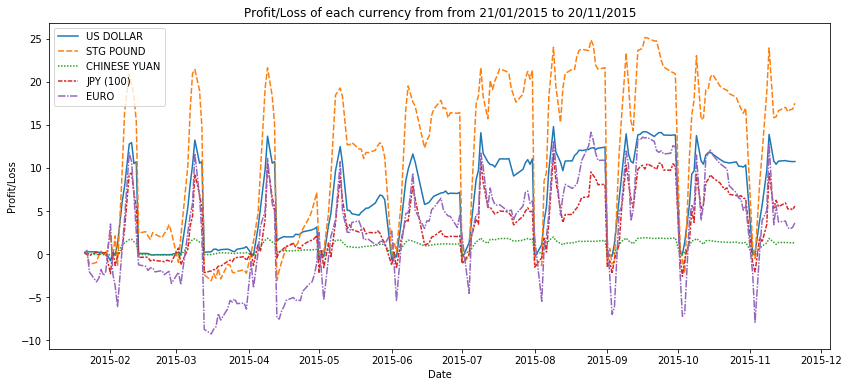

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Profit/Loss of each currency from from 21/01/2015 to 20/11/2015")

sns.lineplot(data = profit_loss_df)

# Add label for horizontal axis
plt.xlabel("Date")

# Add label for horizontal axis
plt.ylabel("Profit/Loss")

**sns.lineplot** tells the notebook that we want to create a line chart.

**sns** indicates that the command comes from the seaborn package.

### Plot a subset of the data

In [8]:
profit_loss_df.columns

Index(['US DOLLAR', 'STG POUND', 'CHINESE YUAN', 'JPY (100)', 'EURO'], dtype='object')

Text(0, 0.5, 'Profit/Loss')

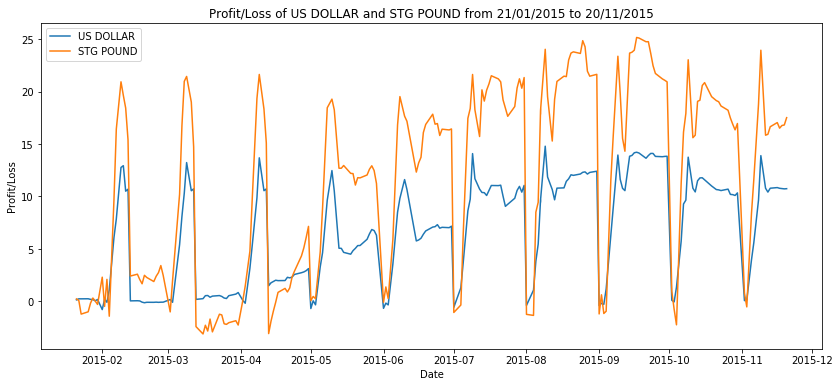

In [9]:
plt.figure(figsize=(14,6))

plt.title("Profit/Loss of US DOLLAR and STG POUND from 21/01/2015 to 20/11/2015")

sns.lineplot(data=profit_loss_df['US DOLLAR'], label="US DOLLAR")

sns.lineplot(data=profit_loss_df['STG POUND'], label="STG POUND")

plt.xlabel("Date")

plt.ylabel("Profit/Loss")

## Bar Charts

In [10]:
# get a sample of 5 currency entries on 2015-10-11
sample_cbk_df = cbk_df.loc['2015-10-11'].head()
sample_cbk_df

,Currency,Mean,Buy,Sell
Date,,,,
2015-10-11,US DOLLAR,102.2443,102.1444,102.3441
2015-10-11,STG POUND,154.2539,154.0806,154.4272
2015-10-11,EURO,109.8417,109.7172,109.9661
2015-10-11,SA RAND,7.1357,7.1265,7.1448
2015-10-11,KES / USHS,33.3027,33.2213,33.3841


Text(0, 0.5, 'Mean Price')

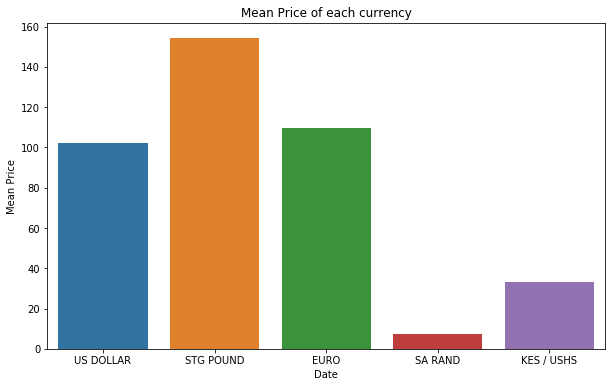

In [11]:
plt.figure(figsize=(10,6))

plt.title("Mean Price of each currency")

sns.barplot(x=sample_cbk_df['Currency'], y=sample_cbk_df['Mean'])

plt.xlabel("Date")

plt.ylabel("Mean Price")

## Heatmap
We create a heatmap to quickly visualize patterns and correlations.

### correlations

In [12]:
profit_loss_df.corr()

,US DOLLAR,STG POUND,CHINESE YUAN,JPY (100),EURO
US DOLLAR,1.000000,0.966608,0.974719,0.939974,0.897680
STG POUND,0.966608,1.000000,0.964162,0.882684,0.921958
CHINESE YUAN,0.974719,0.964162,1.000000,0.879516,0.862694
JPY (100),0.939974,0.882684,0.879516,1.000000,0.903429
EURO,0.897680,0.921958,0.862694,0.903429,1.000000


Text(105.0, 0.5, 'Currency')

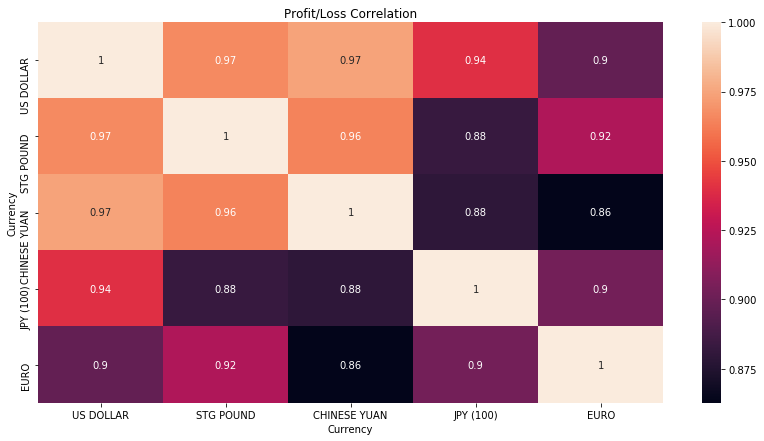

In [13]:
plt.figure(figsize=(14,7))

plt.title("Profit/Loss Correlation")

sns.heatmap(data=profit_loss_df.corr(), annot=True)

plt.xlabel("Currency")

plt.ylabel("Currency")

**annot=True** ensures that the values for each cell appear on the chart. (Leaving this out removes the values from each of the cells!)

### Visualize patterns
Use a heatmap to plot rows against columns to get the values of each cell color-coded for easier interpretation.

See an example in Kaggle's [Bar Charts and Heatmaps](https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps)

In [14]:
# get a sample of 5 currency entries with currency as the index
sample_cbk_df = cbk_df.loc['2015-10-11'].head()
sample_cbk_df = sample_cbk_df.set_index('Currency')
sample_cbk_df

,Mean,Buy,Sell
Currency,,,
US DOLLAR,102.2443,102.1444,102.3441
STG POUND,154.2539,154.0806,154.4272
EURO,109.8417,109.7172,109.9661
SA RAND,7.1357,7.1265,7.1448
KES / USHS,33.3027,33.2213,33.3841


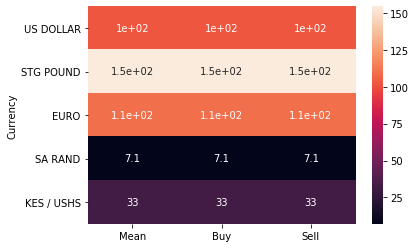

In [15]:
# Heatmap of mean, buy and sell against currency
sns.heatmap(data=sample_cbk_df, annot=True)

## Scatter Plots

To create a simple scatter plot, we use the **sns.scatterplot** command and specify the values for:

* the horizontal x-axis (x=insurance_data['bmi']), and
* the vertical y-axis (y=insurance_data['charges']).

### Continuous Variables
#### 2 Variables

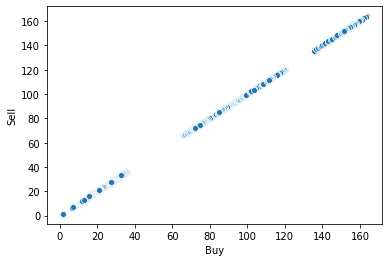

In [16]:
sns.scatterplot(x=cbk_df['Buy'], y=cbk_df['Sell'])

The scatterplot above suggests that Buy and Sell columns are highly positively correlated.

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

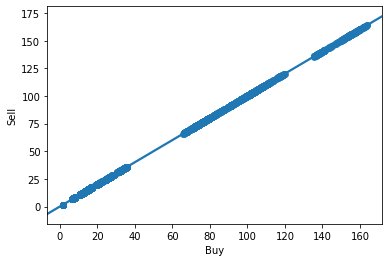

In [17]:
sns.regplot(x=cbk_df['Buy'], y=cbk_df['Sell'])

In [18]:
hr_df = pd.read_csv('IBM HR Analytics.csv')
hr_df.head()

,Age,Attrition,AttritionRaw,BusinessTravel,DailyRate,Department,DeptCode,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Yes,Travel_Rarely,1102,Sales,Sales,1,2,Life Sciences,...,3,1,0,8,0,1,6,4,0,5
1,49,0,No,Travel_Frequently,279,Research & Development,R&D,8,1,Life Sciences,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Yes,Travel_Rarely,1373,Research & Development,R&D,2,2,Other,...,3,2,0,7,3,3,0,0,0,0
3,33,0,No,Travel_Frequently,1392,Research & Development,R&D,3,4,Life Sciences,...,3,3,0,8,3,3,8,7,3,0
4,27,0,No,Travel_Rarely,591,Research & Development,R&D,2,1,Medical,...,3,4,1,6,3,3,2,2,2,2


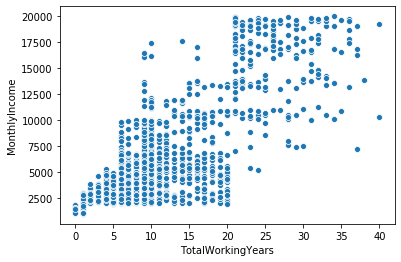

In [19]:
sns.scatterplot(x=hr_df['TotalWorkingYears'], y=hr_df['MonthlyIncome'])

The scatterplot above suggests that TotalWorkingYears and MonthlyIncome are positively correlated, where employees with higher TotalWorkingYears typically also tend to earn more. 

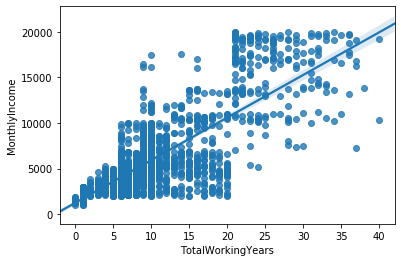

In [28]:
sns.regplot(x=hr_df['TotalWorkingYears'], y=hr_df['MonthlyIncome'])

Since the regression line has a positive slope, this tells us that there is a positive correlation between 'TotalWorkingYears' and 'MonthlyIncome'.

#### 3 Variables (Color-coded scatter plots)
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

[Scatter plot exercise](https://www.kaggle.com/aubreyjohn/exercise-scatter-plots/edit)

For instance, to understand how JobRole affects the TotalWorkingYears and MonthlyIncome, we can color-code the points by 'JobRole', and plot the other two columns ('TotalWorkingYears', 'MonthlyIncome') on the axes.

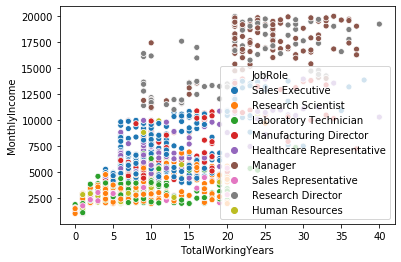

In [21]:
sns.scatterplot(x=hr_df['TotalWorkingYears'], y=hr_df['MonthlyIncome'], hue=hr_df['JobRole'])

To further emphasize, we can use the sns.lmplot command to add regression lines.

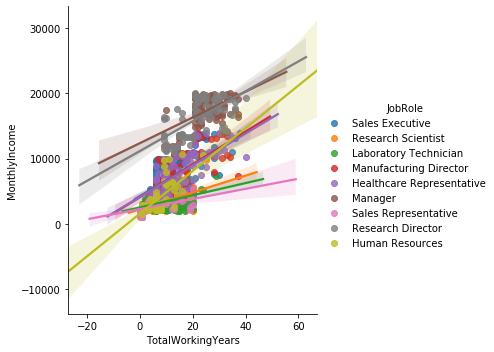

In [22]:
sns.lmplot(x="TotalWorkingYears", y="MonthlyIncome", hue="JobRole", data=hr_df)

### Categorical Variables

Usually, we use scatter plots to highlight the relationship between two continuous variables. However, we can adapt the design of the scatter plot to feature a categorical variable on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the **sns.swarmplot** command.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

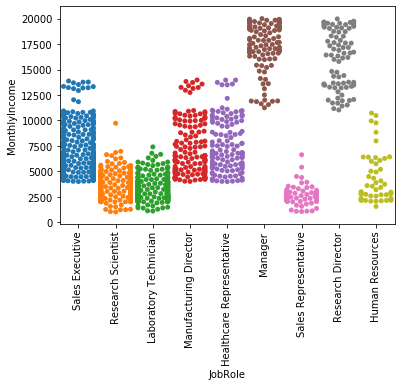

In [27]:
sns.swarmplot(x=hr_df['JobRole'],
              y=hr_df['MonthlyIncome'])
plt.xticks(rotation = 90)

## Distributions

## Histogram

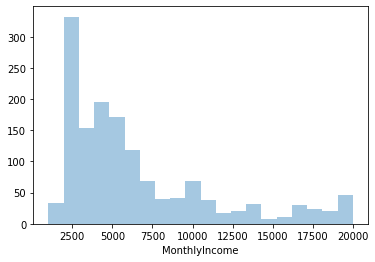

In [29]:
# Histogram 
sns.distplot(a=hr_df['MonthlyIncome'], kde=False)

We customize the behavior of the command with two additional pieces of information:

- **a**= chooses the column we'd like to plot (in this case, we chose 'MonthlyIncome').
- **kde=False** is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

## Density Plots
### kernel density estimate (KDE)
In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the **sns.kdeplot** command. Setting **shade=True** colors the area below the curve.

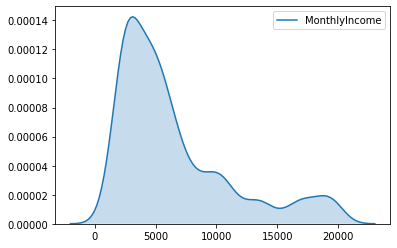

In [31]:
# KDE plot 
sns.kdeplot(data=hr_df['MonthlyIncome'], shade=True)

### 2D KDE Plots
We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the **sns.jointplot** command.

The color-coding shows us how likely we are to see different combinations of attributes, where darker parts of the figure are more likely.

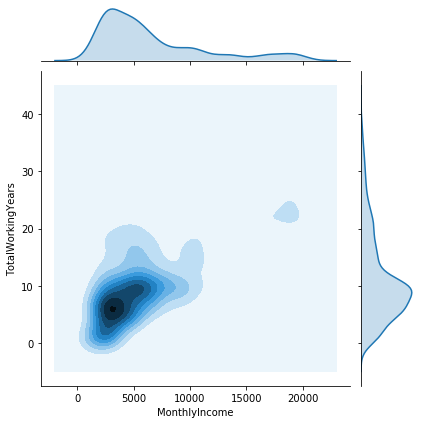

In [33]:
# 2D KDE plot
sns.jointplot(x=hr_df['MonthlyIncome'], y=hr_df['TotalWorkingYears'], kind="kde")

Note that in addition to the 2D KDE plot in the center,

- the curve at the top of the figure is a KDE plot for the data on the x-axis.
- the curve on the right of the figure is a KDE plot for the data on the y-axis.

## Color Coded Plots
Useful when plotting multiple distributions.

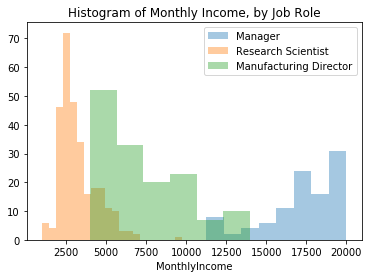

In [39]:
sns.distplot(a=hr_df[hr_df['JobRole']=='Manager'].loc[:, 'MonthlyIncome'], label="Manager", kde=False)
sns.distplot(a=hr_df[hr_df['JobRole']=='Research Scientist'].loc[:, 'MonthlyIncome'], label='Research Scientist', kde=False)
sns.distplot(a=hr_df[hr_df['JobRole']=='Manufacturing Director'].loc[:, 'MonthlyIncome'], label='Manufacturing Director', kde=False)

plt.title("Histogram of Monthly Income, by Job Role")

# Force legend to appear
plt.legend()

Text(0.5, 1.0, 'Distribution of Monthly Income, by Job Role')

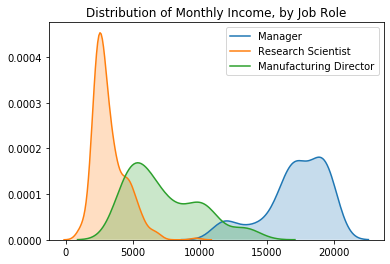

In [40]:
sns.kdeplot(data=hr_df[hr_df['JobRole']=='Manager'].loc[:, 'MonthlyIncome'], label="Manager", shade=True)
sns.kdeplot(data=hr_df[hr_df['JobRole']=='Research Scientist'].loc[:, 'MonthlyIncome'], label='Research Scientist', shade=True)
sns.kdeplot(data=hr_df[hr_df['JobRole']=='Manufacturing Director'].loc[:, 'MonthlyIncome'], label='Manufacturing Director', shade=True)

plt.title("Distribution of Monthly Income, by Job Role")

## Changing styles with seaborn

### Themes
Seaborn has five different themes: **darkgrid**, **whitegrid**, **dark**, **white** and **ticks**.

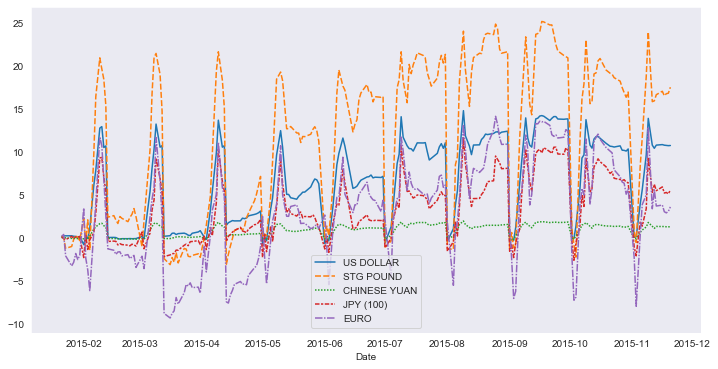

In [42]:
# Change the style of the figure to the "dark" theme
sns.set_style("dark")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_loss_df)

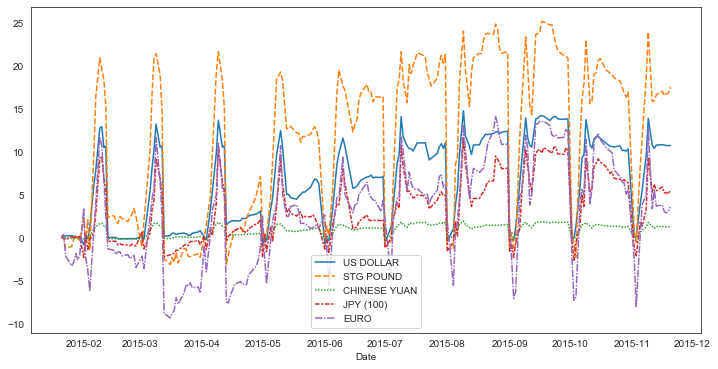

In [43]:
# Change the style of the figure to the "dark" theme
sns.set_style("white")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_loss_df)

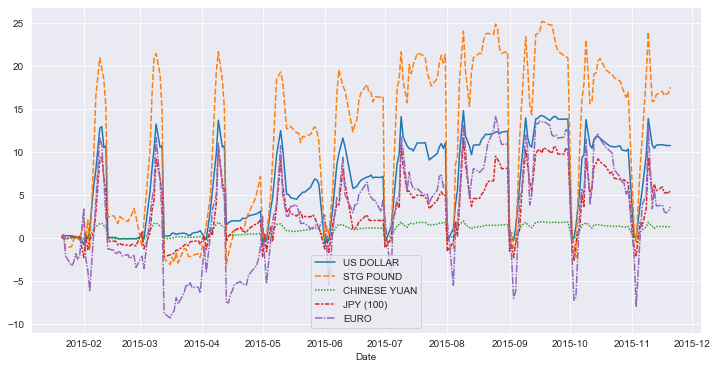

In [44]:
# Change the style of the figure to the "dark" theme
sns.set_style("darkgrid")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_loss_df)

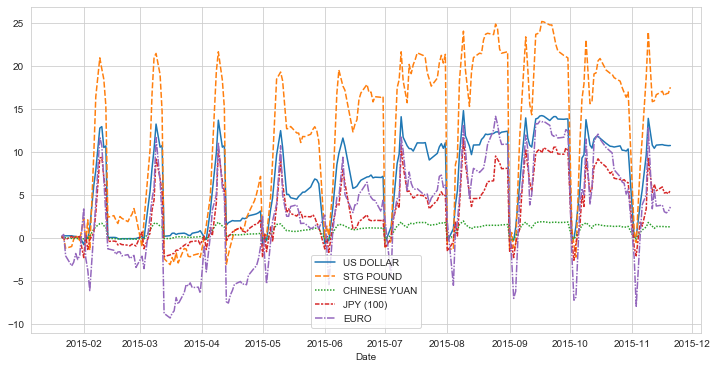

In [45]:
# Change the style of the figure to the "dark" theme
sns.set_style("whitegrid")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_loss_df)

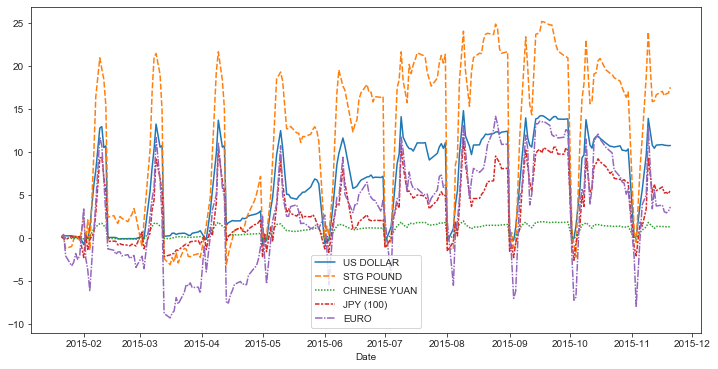

In [46]:
# Change the style of the figure to the "dark" theme
sns.set_style("ticks")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_loss_df)

## Summary
**Trends** - A trend is defined as a pattern of change.
- **sns.lineplot** - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.

**Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
- **sns.barplot** - Bar charts are useful for comparing quantities corresponding to different groups.
- **sns.heatmap** - Heatmaps can be used to find color-coded patterns in tables of numbers.
- **sns.scatterplot** - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
- **sns.regplot** - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
- **sns.lmplot** - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
- **sns.swarmplot** - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.

**Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
- **sns.distplot** - Histograms show the distribution of a single numerical variable.
- **sns.kdeplot** - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
- **sns.jointplot** - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.